In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
import scipy.io.wavfile as wavfile
from scipy.fft import fft

### FFT cross correlation Analysis

In [16]:
# Loading signals one sample from each
sample_rate1,data1= wavfile.read ("Signal Processing Datasets/BirdSongDataset/train/CardinalisCardinalis/(1).wav")
sample_rate2,data2= wavfile.read ("Signal Processing Datasets/BirdSongDataset/train/MelospizaMelodia/(1).wav")

In [ ]:
#FFT for each signal
fft_data1 = np.abs(fft(data1))**2  #Cardinalis
fft_data2 = np.abs(fft(data2))**2  #Melospiza


In [18]:
#checking the length
min_length = min(len(fft_data1), len(fft_data2))
fft_data1, fft_data2 = fft_data1[:min_length], fft_data2[:min_length]

In [19]:
#applying cross correlation on FFT
cross_corr_fft = correlate(fft_data1, fft_data2, mode='full')
lags_fft = np.arange(-len(fft_data1) + 1, len(fft_data1))

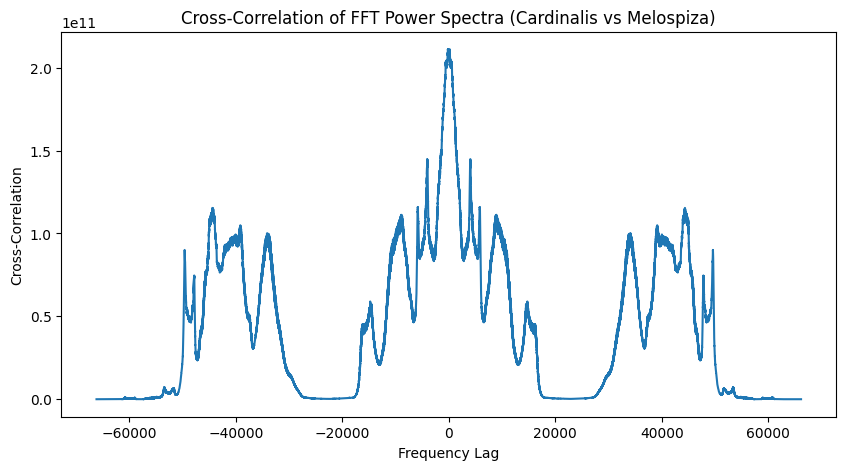

In [20]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(lags_fft, cross_corr_fft)
plt.title("Cross-Correlation of FFT Power Spectra (Cardinalis vs Melospiza)")
plt.xlabel("Frequency Lag")
plt.ylabel("Cross-Correlation")
plt.show()

### STFT auto correlation Analysis

In [11]:
from scipy.signal import stft

In [22]:
#  STFT
frequencies, times, stft_data1 = stft(data1, fs=sample_rate1, nperseg=512)
stft_power1 = np.abs(stft_data1)**2

In [23]:
# Autocorrelation on each frequency bin across time
autocorr_stft = np.array([correlate(stft_power1[i, :], stft_power1[i, :], mode='full') for i in range(len(frequencies))])


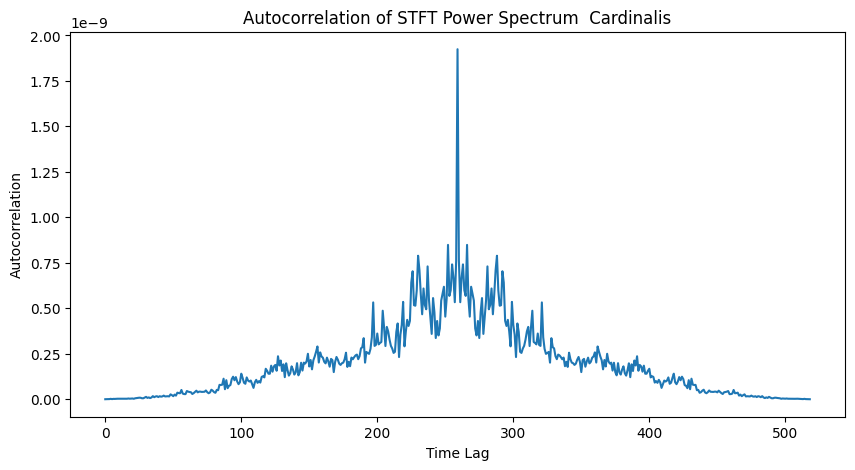

In [25]:
# Plot 
plt.figure(figsize=(10, 5))
plt.plot(autocorr_stft[0])  # Autocorrelation of the first frequency bin
plt.title("Autocorrelation of STFT Power Spectrum  Cardinalis")
plt.xlabel("Time Lag")
plt.ylabel("Autocorrelation")
plt.show()